In [1]:
#Importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

import otter
grader = otter.Notebook("final_project.ipynb")

In [2]:
#Importing dataset heart
heart = pd.read_csv("Datasets/heart.dat", sep = " ",header = None)
print(heart.dtypes)
print(heart.head())

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  70.0  1.0  4.0  130.0  322.0  0.0  2.0  109.0  0.0  2.4  2.0  3.0  3.0   2
1  67.0  0.0  3.0  115.0  564.0  0.0  2.0  160.0  0.0  1.6  2.0  0.0  7.0   1
2  57.0  1.0  2.0  124.0  261.0  0.0  0.0  141.0  0.0  0.3  1.0  0.0  7.0   2
3  64.0  1.0  4.0  128.0  263.0  0.0  0.0  105.0  1.0  0.2  2.0  1.0  7.0   1
4  74.0  0.0  2.0  120.0  269.0  0.0  2.0  121.0  1.0  0.2  1.0  1.0  3.0   1


In [3]:
#fixing dataset
columns = ['age', 'sex', 'chest pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting blood sugar', 'resting_electrocardiographic', 
           'max_heart_rate', 'angina', 'oldpeak', 'slope', 'major_vessels', 'thal', 'heart_disease']

heart.columns = columns

heart = heart.dropna()

X_heart = heart.drop('heart_disease', axis=1)
y_heart = heart['heart_disease']

print(heart.dtypes)
print(heart.head())

age                             float64
sex                             float64
chest pain_type                 float64
resting_blood_pressure          float64
serum_cholestoral               float64
fasting blood sugar             float64
resting_electrocardiographic    float64
max_heart_rate                  float64
angina                          float64
oldpeak                         float64
slope                           float64
major_vessels                   float64
thal                            float64
heart_disease                     int64
dtype: object
    age  sex  chest pain_type  resting_blood_pressure  serum_cholestoral  \
0  70.0  1.0              4.0                   130.0              322.0   
1  67.0  0.0              3.0                   115.0              564.0   
2  57.0  1.0              2.0                   124.0              261.0   
3  64.0  1.0              4.0                   128.0              263.0   
4  74.0  0.0              2.0                 

In [4]:
## Splitting dataset
X_heart_train_80, X_heart_test_20, y_heart_train_80, y_heart_test_20 = train_test_split(X_heart, y_heart, test_size=0.20, random_state=42)
X_heart_train_20, X_heart_test_80, y_heart_train_20, y_heart_test_80 = train_test_split(X_heart, y_heart, test_size=0.80, random_state=42)
X_heart_train_50, X_heart_test_50, y_heart_train_50, y_heart_test_50 = train_test_split(X_heart, y_heart, test_size=0.50, random_state=42)

X_heart_train_val_80, X_heart_val_20, y_heart_train_val_80, y_heart_val_20 = train_test_split(X_heart_train_80, y_heart_train_80, test_size=0.20, random_state=42)
X_heart_train_val_50, X_heart_val_50, y_heart_train_val_50, y_heart_val_50 = train_test_split(X_heart_train_50, y_heart_train_50, test_size=0.50, random_state=42)
X_heart_train_val_20, X_heart_val_80, y_heart_train_val_20, y_heart_val_80 = train_test_split(X_heart_train_20, y_heart_train_20, test_size=0.80, random_state=42)

In [5]:
#Importing dataset Wholesale_customers
Wholesale_customers = pd.read_csv("Datasets/Wholesale_customers.csv")
print(Wholesale_customers.dtypes)
print(Wholesale_customers.head())

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [6]:
#fixing dataset
Wholesale_customers = Wholesale_customers.dropna()
Wholesale_customers['high_fresh_spender'] = (Wholesale_customers['Fresh'] > (Wholesale_customers[['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1))).astype(int)

X_Wholesale_customers = Wholesale_customers.drop(['high_fresh_spender'], axis=1) 
y_Wholesale_customers = Wholesale_customers['high_fresh_spender']

print(Wholesale_customers.dtypes)
print(Wholesale_customers.head())

Channel               int64
Region                int64
Fresh                 int64
Milk                  int64
Grocery               int64
Frozen                int64
Detergents_Paper      int64
Delicassen            int64
high_fresh_spender    int64
dtype: object
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  high_fresh_spender  
0        1338                   0  
1        1776                   0  
2        7844                   0  
3        1788                   0  
4        5185                   0  


In [7]:
## Splitting dataset
X_Wholesale_customers_train_80, X_Wholesale_customers_test_20, y_Wholesale_customers_train_80, y_Wholesale_customers_test_20 = train_test_split(X_Wholesale_customers, y_Wholesale_customers, test_size=0.20, random_state=42)
X_Wholesale_customers_train_20, X_Wholesale_customers_test_80, y_Wholesale_customers_train_20, y_Wholesale_customers_test_80 = train_test_split(X_Wholesale_customers, y_Wholesale_customers, test_size=0.80, random_state=42)
X_Wholesale_customers_train_50, X_Wholesale_customers_test_50, y_Wholesale_customers_train_50, y_Wholesale_customers_test_50 = train_test_split(X_Wholesale_customers, y_Wholesale_customers, test_size=0.50, random_state=42)

X_Wholesale_customers_train_val_80, X_Wholesale_customers_val_20, y_Wholesale_customers_train_val_80, y_Wholesale_customers_val_20 = train_test_split(X_Wholesale_customers_train_80, y_Wholesale_customers_train_80, test_size=0.20, random_state=42)
X_Wholesale_customers_train_val_50, X_Wholesale_customers_val_50, y_Wholesale_customers_train_val_50, y_Wholesale_customers_val_50 = train_test_split(X_Wholesale_customers_train_50, y_Wholesale_customers_train_50, test_size=0.50, random_state=42)
X_Wholesale_customers_train_val_20, X_Wholesale_customers_val_80, y_Wholesale_customers_train_val_20, y_Wholesale_customers_val_80 = train_test_split(X_Wholesale_customers_train_20, y_Wholesale_customers_train_20, test_size=0.80, random_state=42)

In [8]:
#Importing dataset tripadvisor
tripadvisor = pd.read_csv("Datasets/tripadvisor_review.csv")
print(tripadvisor.dtypes)
print(tripadvisor.head())

User ID         object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object
  User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2

In [9]:
#fixing dataset
tripadvisor = tripadvisor.dropna()
tripadvisor['category_label'] = (tripadvisor[['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10']].mean(axis=1) > 1.7).astype(int)
categories_subset = ['Category 1', 'Category 2', 'Category 3']

X_tripadvisor = tripadvisor[categories_subset]
y_tripadvisor = tripadvisor['category_label']

print(tripadvisor.dtypes)
print(tripadvisor.head())

User ID            object
Category 1        float64
Category 2        float64
Category 3        float64
Category 4        float64
Category 5        float64
Category 6        float64
Category 7        float64
Category 8        float64
Category 9        float64
Category 10       float64
category_label      int64
dtype: object
  User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  category_label  
0        2.42        3.19        2.79        1.82         2.42               1  
1        3.18        3.21        2.63        1.86         2.32           

In [10]:
## Splitting dataset
X_tripadvisor_train_80, X_tripadvisor_test_20, y_tripadvisor_train_80, y_tripadvisor_test_20 = train_test_split(X_tripadvisor, y_tripadvisor, test_size=0.20, random_state=42)
X_tripadvisor_train_20, X_tripadvisor_test_80, y_tripadvisor_train_20, y_tripadvisor_test_80 = train_test_split(X_tripadvisor, y_tripadvisor, test_size=0.80, random_state=42)
X_tripadvisor_train_50, X_tripadvisor_test_50, y_tripadvisor_train_50, y_tripadvisor_test_50 = train_test_split(X_tripadvisor, y_tripadvisor, test_size=0.50, random_state=42)

X_tripadvisor_train_val_80, X_tripadvisor_val_20, y_tripadvisor_train_val_80, y_tripadvisor_val_20 = train_test_split(X_tripadvisor_train_80, y_tripadvisor_train_80, test_size=0.20, random_state=42)
X_tripadvisor_train_val_50, X_tripadvisor_val_50, y_tripadvisor_train_val_50, y_tripadvisor_val_50 = train_test_split(X_tripadvisor_train_50, y_tripadvisor_train_50, test_size=0.50, random_state=42)
X_tripadvisor_train_val_20, X_tripadvisor_val_80, y_tripadvisor_train_val_20, y_tripadvisor_val_80 = train_test_split(X_tripadvisor_train_20, y_tripadvisor_train_20, test_size=0.80, random_state=42)

In [11]:
##SVM
def train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test):

    kernels = ['linear', 'rbf', 'poly']
    results = []
    training_errors = []
    validation_errors = []
    
    for c in range(3):

        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        X_val = sc_X.transform(X_val)
        
        svm_classifier = svm.SVC(kernel=kernels[c], random_state=0)
    
        scores = cross_val_score(svm_classifier, X_train, y_train, cv=3, scoring='accuracy')
        
        svm_classifier.fit(X_train, y_train)
        
        y_pred_test = svm_classifier.predict(X_test)
        y_pred_train = svm_classifier.predict(X_train)
        y_pred_val = svm_classifier.predict(X_val)
    
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        cross_val_mean = scores.mean()

        train_error = 1 - accuracy_train
        val_error = 1 - accuracy_val
        training_errors.append(train_error)
        validation_errors.append(val_error)

        results.append({'Kernel': kernels[c], 'Train Accuracy': accuracy_train, 'Validation Accuracy': accuracy_val, 'Test Accuracy': accuracy_test, 'Cross-Validation Accuracy': cross_val_mean})

    results_df = pd.DataFrame(results)

    avg_results = results_df[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Cross-Validation Accuracy']].mean()
    avg_results_df = pd.DataFrame(avg_results).transpose()
    
    print(results_df.to_string(index=False))

    print("\nAverage Results:\n")
    print(avg_results_df.to_string(index=False))

    plt.figure(figsize=(5, 3))
    plt.plot(kernels, training_errors, label='Training Error', marker='o', linestyle='-', color='blue')
    plt.plot(kernels, validation_errors, label='Validation Error', marker='o', linestyle='--', color='red')
    plt.xlabel('Kernel Type')
    plt.ylabel('Classification Error')
    plt.title('Training and Validation Error vs Kernel Type')
    plt.legend()
    plt.grid(True)
    plt.show()

    error_matrix = np.array([training_errors, validation_errors]) 

    plt.figure(figsize=(6, 3))
    sns.heatmap(error_matrix, annot=True, fmt=".3f", cmap='viridis', xticklabels=kernels, yticklabels=['Training Error', 'Validation Error'])
    plt.title('Heatmap of Training and Validation Errors for Different Kernels')
    plt.xlabel('Kernel Type')
    plt.ylabel('Error Type')
    plt.show()

Results for 0.20 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.854651             0.795455       0.888889                   0.808026
   rbf        0.924419             0.818182       0.851852                   0.808026
  poly        0.930233             0.840909       0.833333                   0.802380

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.903101             0.818182       0.858025                   0.806144


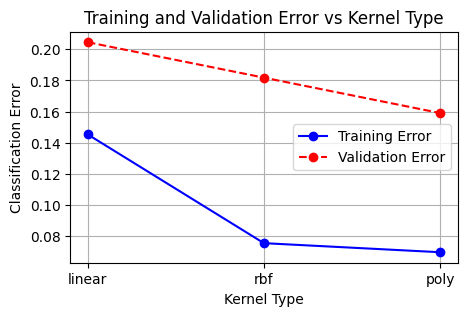

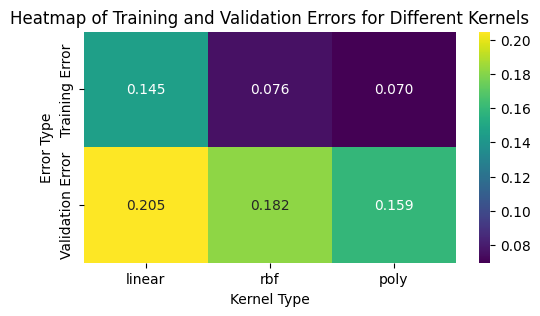


Results for 0.50 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.895522             0.779412       0.807407                   0.852437
   rbf        0.925373             0.852941       0.814815                   0.822134
  poly        0.955224             0.764706       0.770370                   0.791831

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.925373              0.79902       0.797531                   0.822134


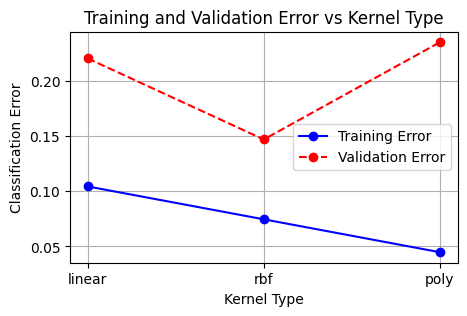

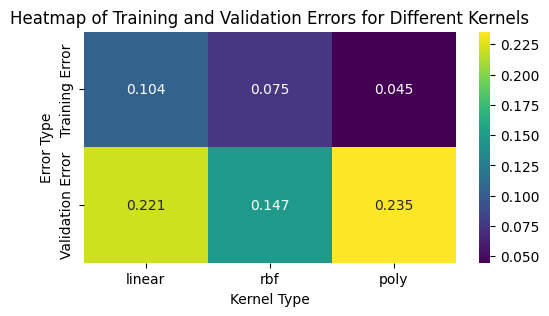


Results for 0.80 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear             1.0             0.727273       0.722222                   0.805556
   rbf             1.0             0.795455       0.731481                   0.611111
  poly             1.0             0.727273       0.708333                   0.611111

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0                 0.75       0.720679                   0.675926


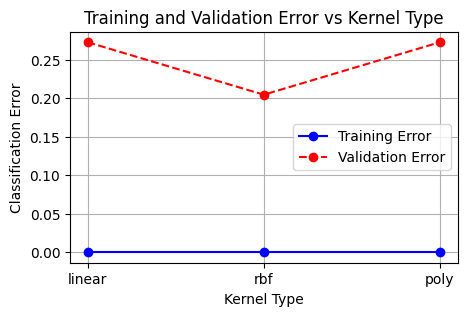

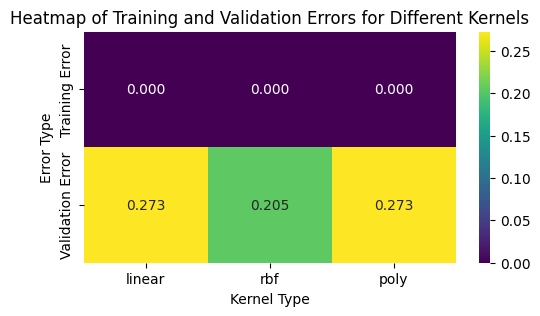

In [12]:
## Heart SVM
print("Results for 0.20 Split:\n")
train_and_evaluate_svm(X_heart_train_val_80, y_heart_train_val_80, X_heart_val_20, y_heart_val_20, X_heart_test_20, y_heart_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_svm(X_heart_train_val_50, y_heart_train_val_50, X_heart_val_50, y_heart_val_50, X_heart_test_50, y_heart_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_svm(X_heart_train_val_20, y_heart_train_val_20, X_heart_val_80, y_heart_val_80, X_heart_test_80, y_heart_test_80)

Results for 0.20 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.992883             0.985915       0.931818                   0.982231
   rbf        0.918149             0.971831       0.886364                   0.889804
  poly        0.804270             0.830986       0.727273                   0.761649

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.905101             0.929577       0.848485                   0.877895


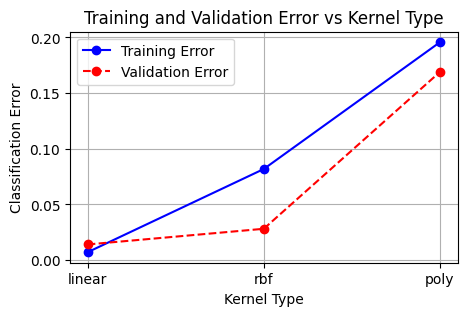

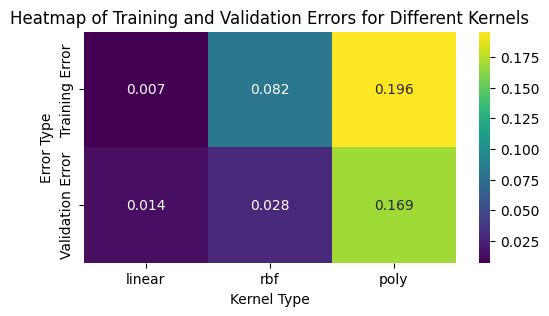


Results for 0.50 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        1.000000             0.945455       0.977273                   0.972472
   rbf        0.945455             0.936364       0.931818                   0.908659
  poly        0.809091             0.772727       0.759091                   0.718468

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.918182             0.884848       0.889394                   0.866533


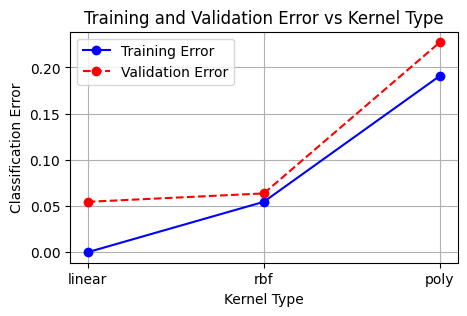

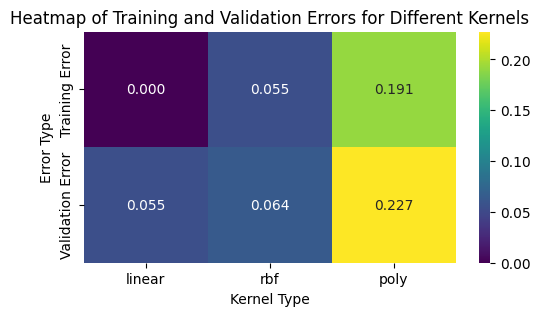


Results for 0.80 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.882353             0.830986       0.821023                   0.833333
   rbf        0.882353             0.647887       0.676136                   0.766667
  poly        0.882353             0.591549       0.659091                   0.766667

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.882353             0.690141        0.71875                   0.788889


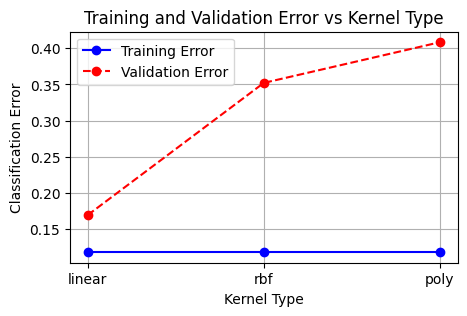

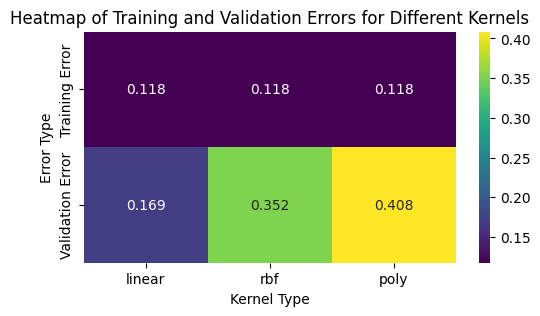

In [13]:
## Wholesale_customers SVM
print("Results for 0.20 Split:\n")
train_and_evaluate_svm(X_Wholesale_customers_train_val_80, y_Wholesale_customers_train_val_80, X_Wholesale_customers_val_20, y_Wholesale_customers_val_20, X_Wholesale_customers_test_20, y_Wholesale_customers_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_svm(X_Wholesale_customers_train_val_50, y_Wholesale_customers_train_val_50, X_Wholesale_customers_val_50, y_Wholesale_customers_val_50, X_Wholesale_customers_test_50, y_Wholesale_customers_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_svm(X_Wholesale_customers_train_val_20, y_Wholesale_customers_train_val_20, X_Wholesale_customers_val_80, y_Wholesale_customers_val_80, X_Wholesale_customers_test_80, y_Wholesale_customers_test_80)

Results for 0.20 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.822967             0.783439       0.795918                   0.807018
   rbf        0.837321             0.783439       0.801020                   0.822967
  poly        0.795853             0.789809       0.780612                   0.786284

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.818713             0.785563       0.792517                   0.805423


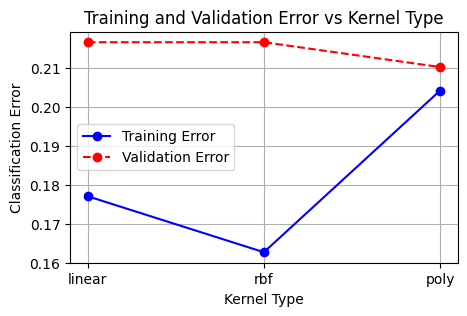

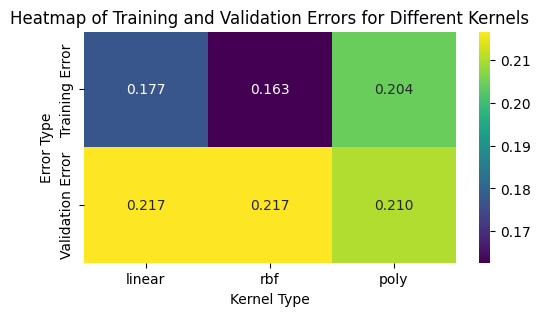


Results for 0.50 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.795918             0.820408       0.812245                   0.787915
   rbf        0.812245             0.783673       0.785714                   0.771454
  poly        0.779592             0.742857       0.724490                   0.759259

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.795918             0.782313        0.77415                   0.772876


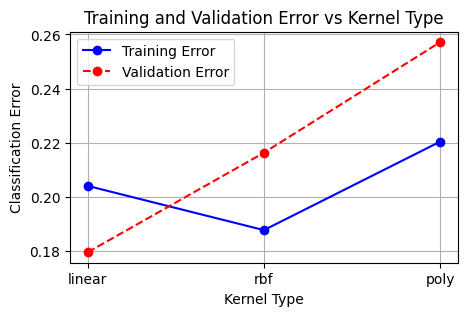

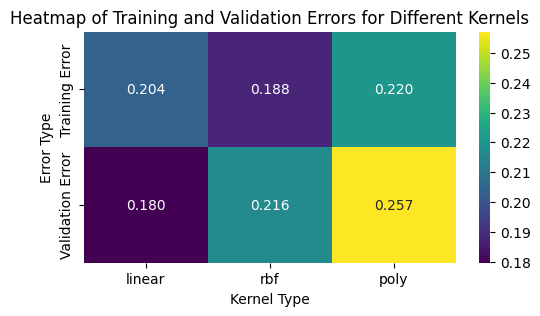


Results for 0.80 Split:

Kernel  Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
linear        0.769231             0.770701       0.764031                   0.666667
   rbf        0.820513             0.751592       0.737245                   0.692308
  poly        0.717949             0.789809       0.724490                   0.641026

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.769231             0.770701       0.741922                   0.666667


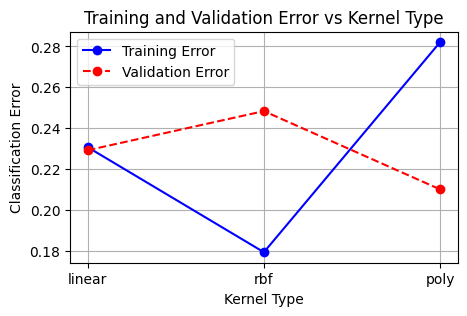

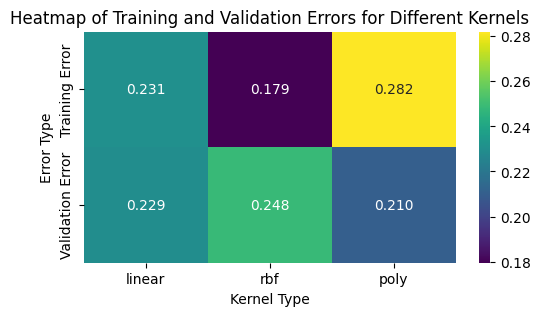

In [14]:
## Tripadvistor SVM
print("Results for 0.20 Split:\n")
train_and_evaluate_svm(X_tripadvisor_train_val_80, y_tripadvisor_train_val_80, X_tripadvisor_val_20, y_tripadvisor_val_20, X_tripadvisor_test_20, y_tripadvisor_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_svm(X_tripadvisor_train_val_50, y_tripadvisor_train_val_50, X_tripadvisor_val_50, y_tripadvisor_val_50, X_tripadvisor_test_50, y_tripadvisor_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_svm(X_tripadvisor_train_val_20, y_tripadvisor_train_val_20, X_tripadvisor_val_80, y_tripadvisor_val_80, X_tripadvisor_test_80, y_tripadvisor_test_80)

In [15]:
##Logistic regression
def train_and_evaluate_log_reg(X_train, y_train, X_val, y_val, X_test, y_test):

    C = [0.1, 1, 10]
    penalty = ['l2', 'l2', 'l2']
    max_iter = [50, 100, 200]
    results = []
    training_errors = []
    validation_errors = []
    
    for c in range(3):
    
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        X_val = sc_X.transform(X_val)
    
        log_reg = LogisticRegression(C = C[c], penalty = penalty[c], max_iter = max_iter[c])
    
        scores = cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')
        
        log_reg.fit(X_train, y_train)
        
        y_pred_test = log_reg.predict(X_test)
        y_pred_train = log_reg.predict(X_train)
        y_pred_val = log_reg.predict(X_val)
        
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        cross_val_mean = scores.mean()
    
        train_error = 1 - accuracy_train
        val_error = 1 - accuracy_val
        training_errors.append(train_error)
        validation_errors.append(val_error)
        
        results.append({'Train Accuracy': accuracy_train, 'Validation Accuracy': accuracy_val, 'Test Accuracy': accuracy_test, 'Cross-Validation Accuracy': cross_val_mean})

    results_df = pd.DataFrame(results)
    
    avg_results = results_df[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Cross-Validation Accuracy']].mean()
    avg_results_df = pd.DataFrame(avg_results).transpose()
    
    print(results_df.to_string(index=False))

    print("\nAverage Results:\n")
    print(avg_results_df.to_string(index=False))

    plt.figure(figsize=(5, 3))
    plt.plot(C, training_errors, label='Training Error', marker='o', linestyle='-', color='blue')
    plt.plot(C, validation_errors, label='Validation Error', marker='o', linestyle='--', color='red')
    plt.xlabel('C Value')
    plt.ylabel('Classification Error')
    plt.title('Training and Validation Error vs C Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    error_matrix = np.array([training_errors, validation_errors]) 

    plt.figure(figsize=(6, 3))
    sns.heatmap(error_matrix, annot=True, fmt=".3f", cmap='viridis', xticklabels=C, yticklabels=['Training Error', 'Validation Error'])
    plt.title('Heatmap of Training and Validation Errors for Different C Values')
    plt.xlabel('C Value')
    plt.ylabel('Error Type')
    plt.show()

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.848837             0.772727       0.907407                   0.831317
       0.848837             0.772727       0.925926                   0.808026
       0.848837             0.795455       0.944444                   0.808026

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.848837             0.780303       0.925926                   0.815789


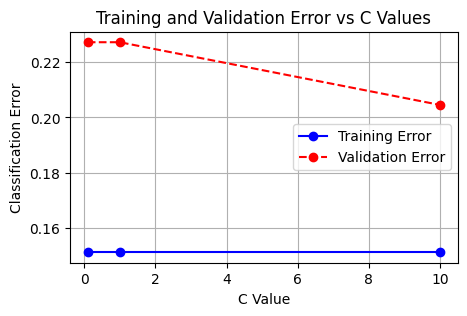

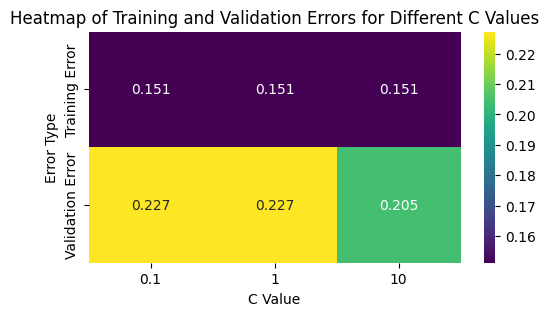


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.880597             0.794118       0.822222                   0.867589
       0.865672             0.764706       0.814815                   0.852437
       0.850746             0.794118       0.800000                   0.806983

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.865672             0.784314       0.812346                   0.842336


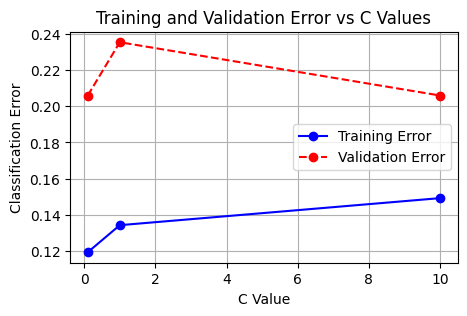

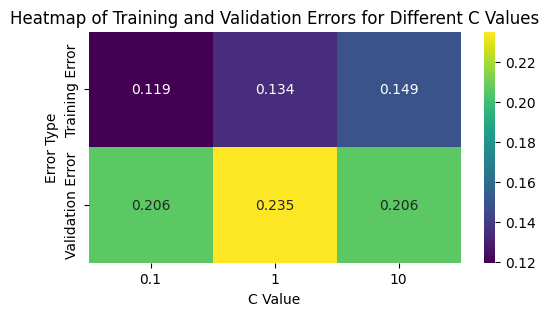


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.840909       0.745370                   0.722222
            1.0             0.750000       0.731481                   0.805556
            1.0             0.727273       0.740741                   0.805556

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.772727       0.739198                   0.777778


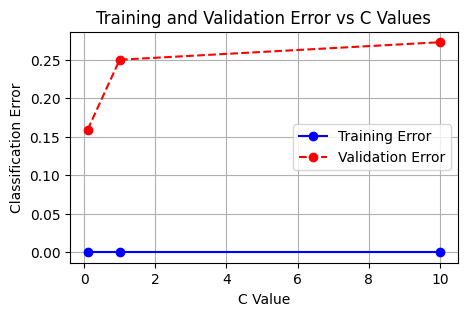

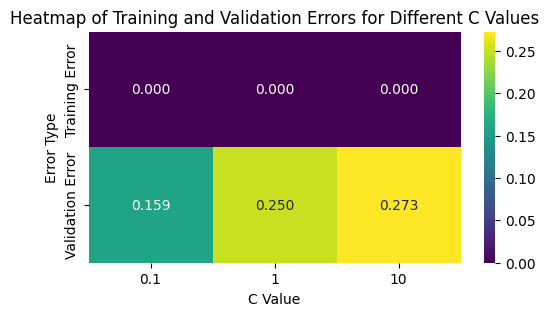

In [16]:
## Heart log_reg
print("Results for 0.20 Split:\n")
train_and_evaluate_log_reg(X_heart_train_val_80, y_heart_train_val_80, X_heart_val_20, y_heart_val_20, X_heart_test_20, y_heart_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_log_reg(X_heart_train_val_50, y_heart_train_val_50, X_heart_val_50, y_heart_val_50, X_heart_test_50, y_heart_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_log_reg(X_heart_train_val_20, y_heart_train_val_20, X_heart_val_80, y_heart_val_80, X_heart_test_80, y_heart_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.907473             0.957746       0.852273                   0.889804
       0.967972             1.000000       0.909091                   0.936094
       0.996441             0.985915       0.931818                   0.982231

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.957295             0.981221       0.897727                   0.936043


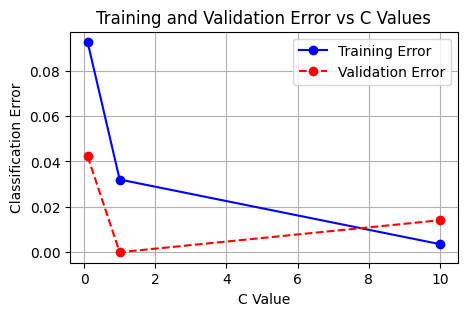

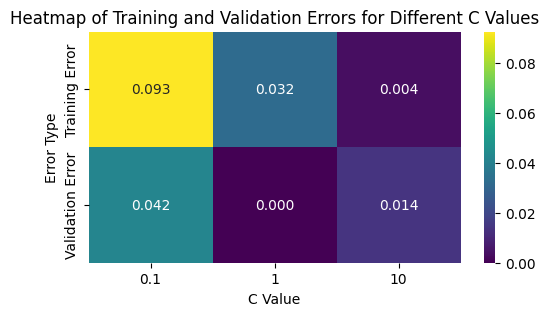


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.936364             0.927273       0.936364                   0.908909
       0.981818             0.963636       0.963636                   0.954454
       1.000000             0.954545       0.972727                   0.981732

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.972727             0.948485       0.957576                   0.948365


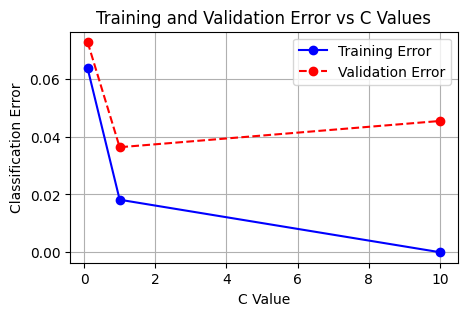

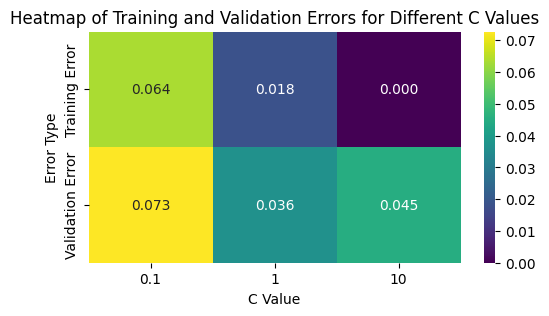


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.882353             0.647887       0.664773                   0.766667
       0.882353             0.788732       0.781250                   0.833333
       1.000000             0.859155       0.883523                   0.944444

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.921569             0.765258       0.776515                   0.848148


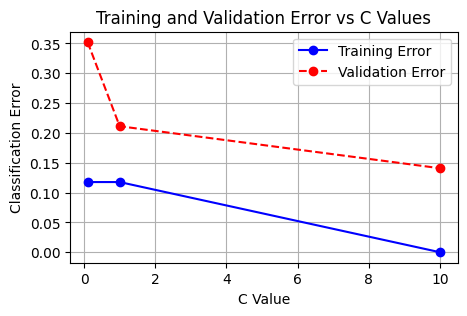

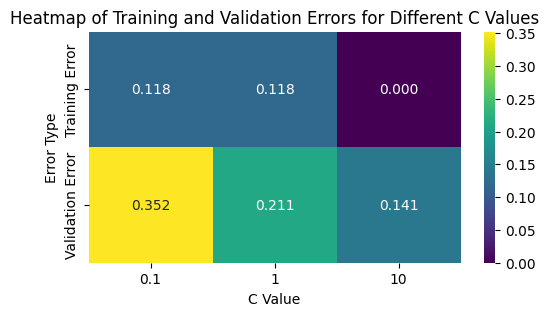

In [17]:
## Wholesale_customers log_reg
print("Results for 0.20 Split:\n")
train_and_evaluate_log_reg(X_Wholesale_customers_train_val_80, y_Wholesale_customers_train_val_80, X_Wholesale_customers_val_20, y_Wholesale_customers_val_20, X_Wholesale_customers_test_20, y_Wholesale_customers_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_log_reg(X_Wholesale_customers_train_val_50, y_Wholesale_customers_train_val_50, X_Wholesale_customers_val_50, y_Wholesale_customers_val_50, X_Wholesale_customers_test_50, y_Wholesale_customers_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_log_reg(X_Wholesale_customers_train_val_20, y_Wholesale_customers_train_val_20, X_Wholesale_customers_val_80, y_Wholesale_customers_val_80, X_Wholesale_customers_test_80, y_Wholesale_customers_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.818182             0.808917       0.795918                   0.816587
       0.826156             0.783439       0.795918                   0.818182
       0.826156             0.783439       0.795918                   0.818182

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.823498             0.791932       0.795918                    0.81765


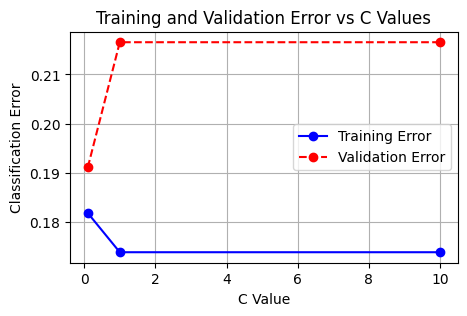

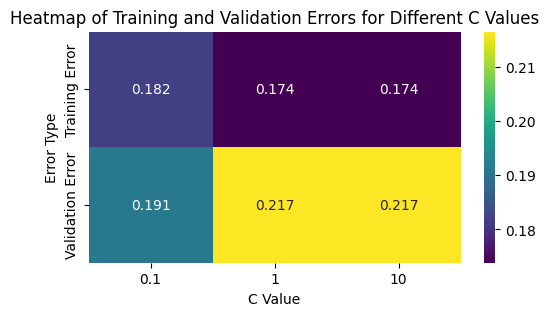


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.795918             0.816327       0.806122                   0.779735
       0.791837             0.824490       0.806122                   0.779735
       0.791837             0.824490       0.810204                   0.787865

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.793197             0.821769       0.807483                   0.782445


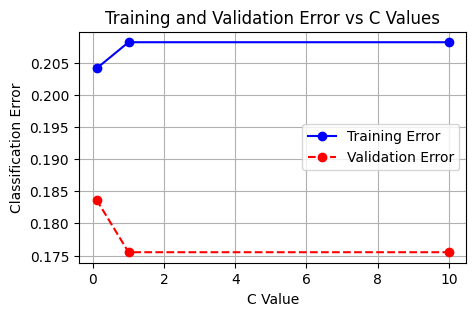

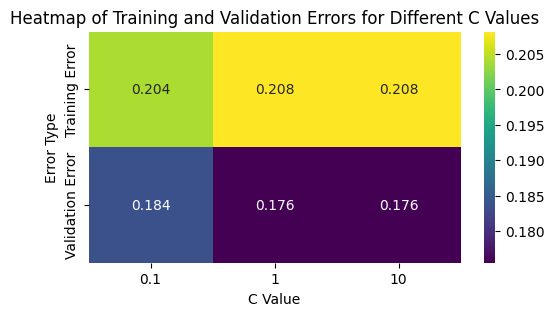


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.769231             0.777070       0.762755                   0.794872
       0.769231             0.789809       0.764031                   0.769231
       0.769231             0.777070       0.760204                   0.769231

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.769231             0.781316        0.76233                   0.777778


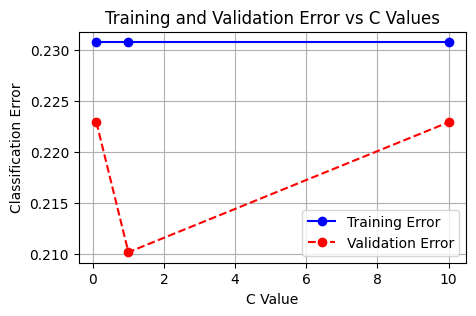

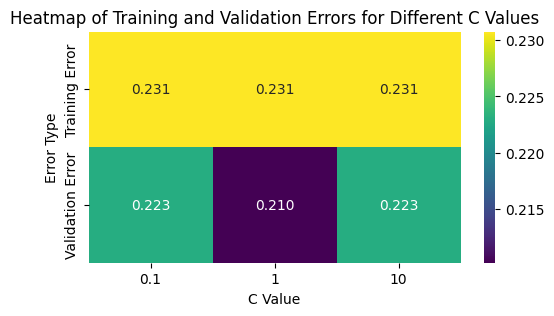

In [18]:
## Tripadvistor log_reg
print("Results for 0.20 Split:\n")
train_and_evaluate_log_reg(X_tripadvisor_train_val_80, y_tripadvisor_train_val_80, X_tripadvisor_val_20, y_tripadvisor_val_20, X_tripadvisor_test_20, y_tripadvisor_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_log_reg(X_tripadvisor_train_val_50, y_tripadvisor_train_val_50, X_tripadvisor_val_50, y_tripadvisor_val_50, X_tripadvisor_test_50, y_tripadvisor_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_log_reg(X_tripadvisor_train_val_20, y_tripadvisor_train_val_20, X_tripadvisor_val_80, y_tripadvisor_val_80, X_tripadvisor_test_80, y_tripadvisor_test_80)

In [19]:
##Decision Tree
def train_and_evaluate_dt(X_train, y_train, X_val, y_val, X_test, y_test):

    values = [3, 5, 10]
    results = []
    training_errors = []
    validation_errors = []

    for c in range(3):

        dt = DecisionTreeClassifier(max_depth = values[c], min_samples_split = values[c])
    
        scores = cross_val_score(dt, X_train, y_train, cv=3, scoring='accuracy')
        
        dt.fit(X_train, y_train)
        
        y_pred_test = dt.predict(X_test)
        y_pred_train = dt.predict(X_train)
        y_pred_val = dt.predict(X_val)
        
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        cross_val_mean = scores.mean()

        train_error = 1 - accuracy_train
        val_error = 1 - accuracy_val
        training_errors.append(train_error)
        validation_errors.append(val_error)

        results.append({'Train Accuracy': accuracy_train, 'Validation Accuracy': accuracy_val, 'Test Accuracy': accuracy_test, 'Cross-Validation Accuracy': cross_val_mean})

    results_df = pd.DataFrame(results)
    
    avg_results = results_df[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Cross-Validation Accuracy']].mean()
    avg_results_df = pd.DataFrame(avg_results).transpose()
    
    print(results_df.to_string(index=False))

    print("\nAverage Results:\n")
    print(avg_results_df.to_string(index=False))

    plt.figure(figsize=(5, 3))
    plt.plot(values, training_errors, label='Training Error', marker='o', linestyle='-', color='blue')
    plt.plot(values, validation_errors, label='Validation Error', marker='o', linestyle='--', color='red')
    plt.xlabel('Parameter Values')
    plt.ylabel('Classification Error')
    plt.title('Training and Validation Error vs Parameter Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    error_matrix = np.array([training_errors, validation_errors]) 

    plt.figure(figsize=(6, 3))
    sns.heatmap(error_matrix, annot=True, fmt=".3f", cmap='viridis', xticklabels=values, yticklabels=['Training Error', 'Validation Error'])
    plt.title('Heatmap of Training and Validation Errors for Different Parameter Values')
    plt.xlabel('Parameter Values')
    plt.ylabel('Error Type')
    plt.show()

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.843023             0.840909       0.722222                   0.773341
       0.930233             0.750000       0.703704                   0.744202
       0.924419             0.750000       0.685185                   0.761746

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.899225             0.780303       0.703704                   0.759763


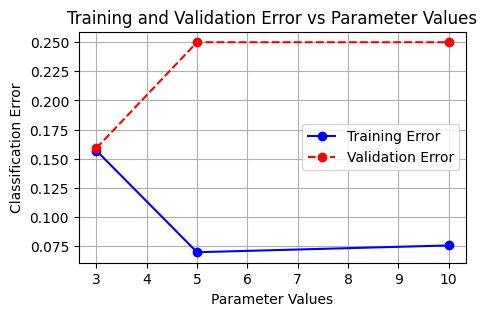

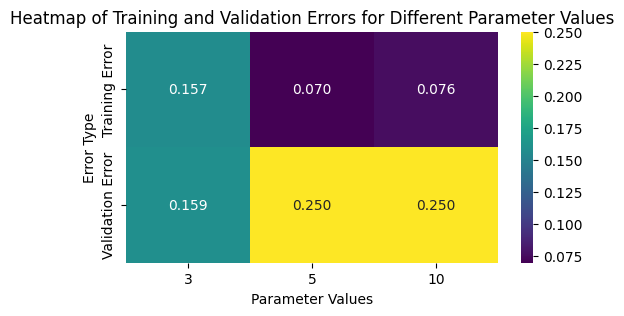


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.940299             0.764706       0.674074                   0.747694
       0.955224             0.779412       0.688889                   0.747694
       0.940299             0.720588       0.725926                   0.702240

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.945274             0.754902       0.696296                   0.732543


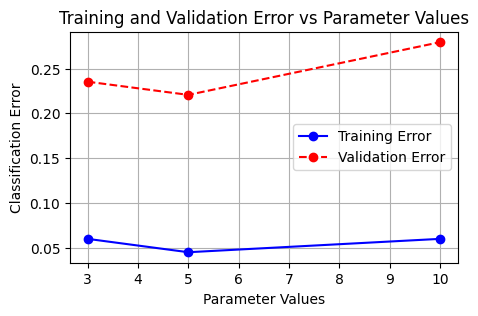

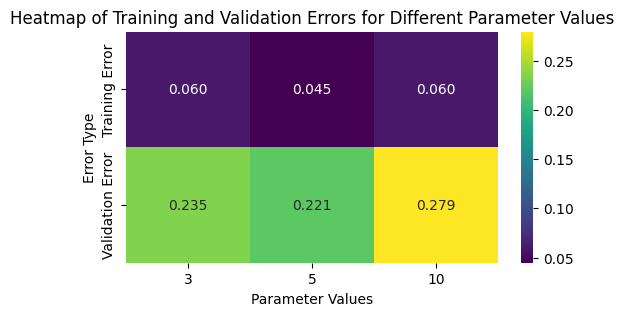


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.704545       0.736111                   0.666667
            1.0             0.704545       0.560185                   1.000000
            1.0             0.704545       0.560185                   0.611111

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.704545       0.618827                   0.759259


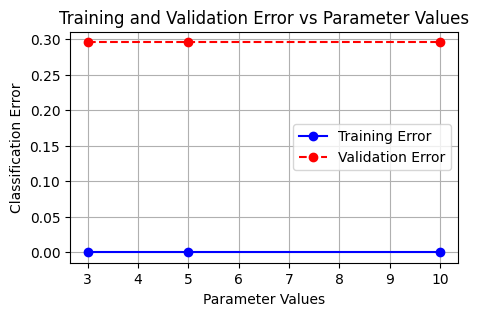

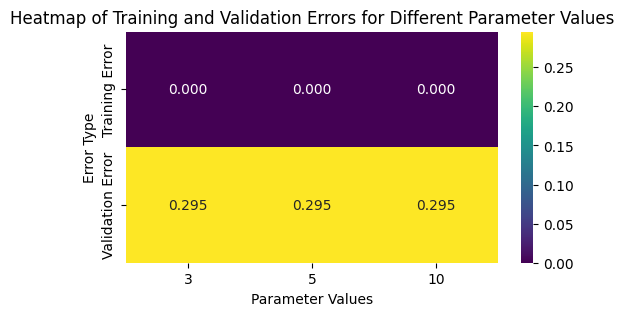

In [20]:
## Heart dt
print("Results for 0.20 Split:\n")
train_and_evaluate_dt(X_heart_train_val_80, y_heart_train_val_80, X_heart_val_20, y_heart_val_20, X_heart_test_20, y_heart_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_dt(X_heart_train_val_50, y_heart_train_val_50, X_heart_val_50, y_heart_val_50, X_heart_test_50, y_heart_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_dt(X_heart_train_val_20, y_heart_train_val_20, X_heart_val_80, y_heart_val_80, X_heart_test_80, y_heart_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.889680             0.830986       0.806818                   0.822161
       0.982206             0.859155       0.840909                   0.850606
       0.960854             0.859155       0.806818                   0.850568

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.944247             0.849765       0.818182                   0.841112


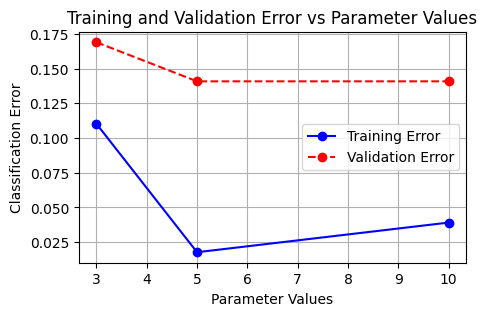

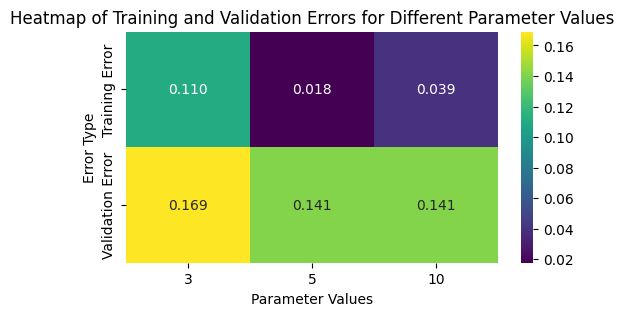


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.918182             0.800000       0.827273                   0.772523
       0.990909             0.790909       0.827273                   0.800050
       0.945455             0.845455       0.822727                   0.781782

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.951515             0.812121       0.825758                   0.784785


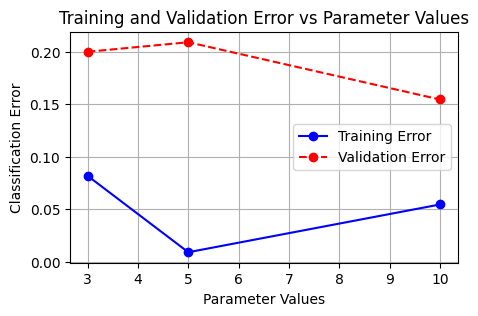

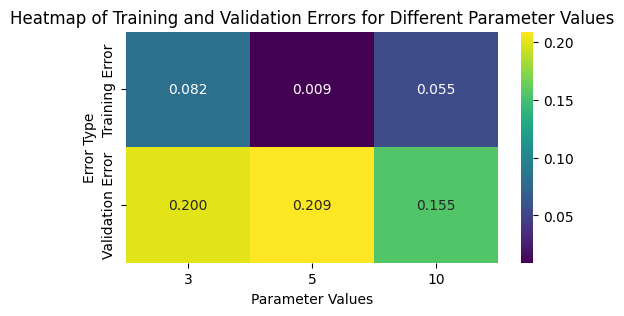


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.941176             0.873239       0.806818                   0.833333
       0.882353             0.830986       0.744318                   0.777778
       0.882353             0.830986       0.744318                   0.766667

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.901961              0.84507       0.765152                   0.792593


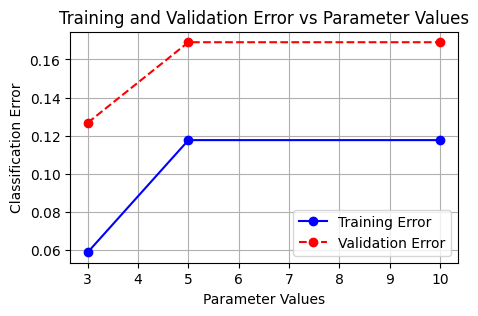

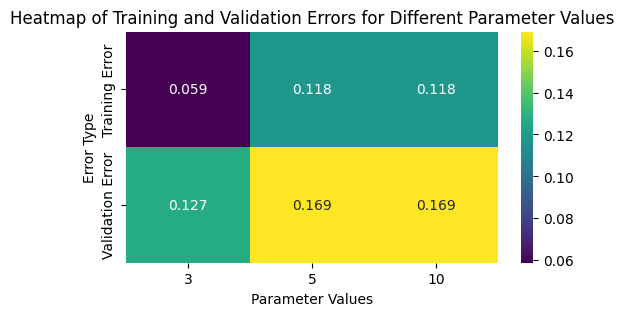

In [21]:
## Wholesale_customers dt
print("Results for 0.20 Split:\n")
train_and_evaluate_dt(X_Wholesale_customers_train_val_80, y_Wholesale_customers_train_val_80, X_Wholesale_customers_val_20, y_Wholesale_customers_val_20, X_Wholesale_customers_test_20, y_Wholesale_customers_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_dt(X_Wholesale_customers_train_val_50, y_Wholesale_customers_train_val_50, X_Wholesale_customers_val_50, y_Wholesale_customers_val_50, X_Wholesale_customers_test_50, y_Wholesale_customers_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_dt(X_Wholesale_customers_train_val_20, y_Wholesale_customers_train_val_20, X_Wholesale_customers_val_80, y_Wholesale_customers_val_80, X_Wholesale_customers_test_80, y_Wholesale_customers_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.813397             0.745223       0.780612                   0.797448
       0.859649             0.726115       0.744898                   0.802233
       0.910686             0.700637       0.755102                   0.784689

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.861244             0.723992       0.760204                    0.79479


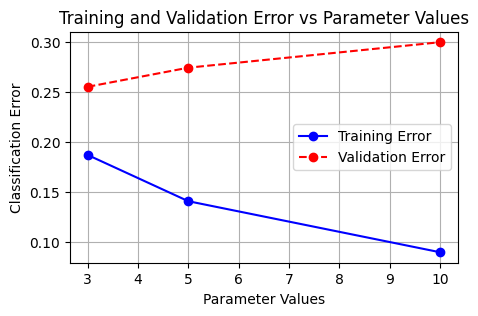

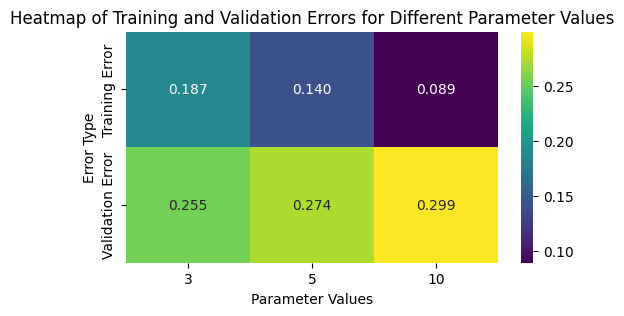


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.820408             0.767347       0.779592                   0.763324
       0.844898             0.775510       0.765306                   0.755094
       0.906122             0.702041       0.710204                   0.754893

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.857143             0.748299       0.751701                    0.75777


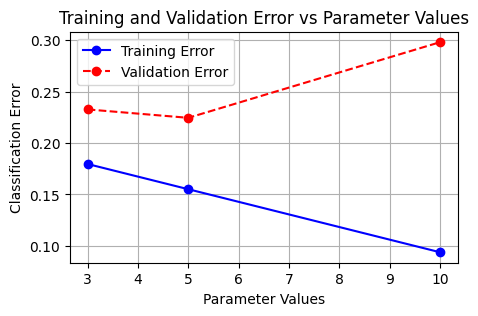

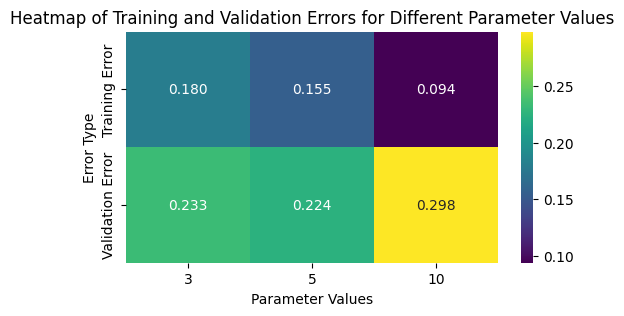


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.897436             0.636943       0.565051                   0.589744
       0.923077             0.656051       0.612245                   0.692308
       0.871795             0.636943       0.590561                   0.589744

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.897436             0.643312       0.589286                   0.623932


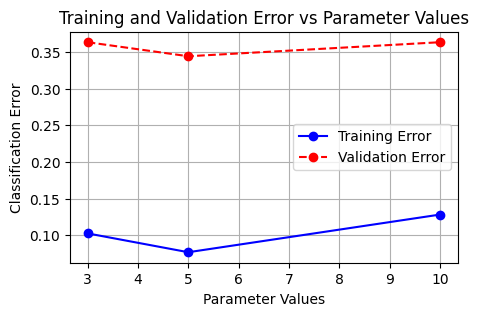

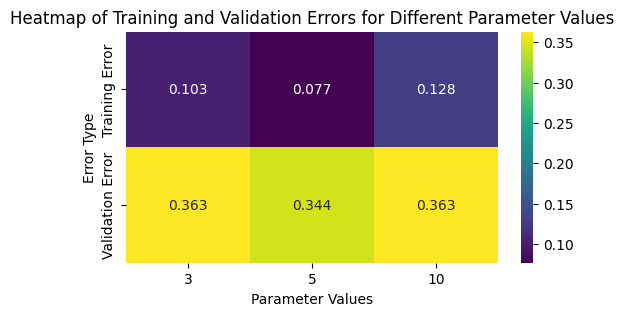

In [22]:
## Tripadvistor dt
print("Results for 0.20 Split:\n")
train_and_evaluate_dt(X_tripadvisor_train_val_80, y_tripadvisor_train_val_80, X_tripadvisor_val_20, y_tripadvisor_val_20, X_tripadvisor_test_20, y_tripadvisor_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_dt(X_tripadvisor_train_val_50, y_tripadvisor_train_val_50, X_tripadvisor_val_50, y_tripadvisor_val_50, X_tripadvisor_test_50, y_tripadvisor_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_dt(X_tripadvisor_train_val_20, y_tripadvisor_train_val_20, X_tripadvisor_val_80, y_tripadvisor_val_80, X_tripadvisor_test_80, y_tripadvisor_test_80)

In [23]:
##Random forest
def train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test):

    n_estimators = [10, 50, 100]
    max_depth = [None, 10, 20]
    results = []
    training_errors = []
    validation_errors = []

    for c in range(3):

        rf = RandomForestClassifier(n_estimators = n_estimators[c], max_depth = max_depth[c])
    
        scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
        
        rf.fit(X_train, y_train)
        
        y_pred_test = rf.predict(X_test)
        y_pred_train = rf.predict(X_train)
        y_pred_val = rf.predict(X_val)
        
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        cross_val_mean = scores.mean()

        train_error = 1 - accuracy_train
        val_error = 1 - accuracy_val
        training_errors.append(train_error)
        validation_errors.append(val_error)
    
        results.append({'Train Accuracy': accuracy_train, 'Validation Accuracy': accuracy_val, 'Test Accuracy': accuracy_test, 'Cross-Validation Accuracy': cross_val_mean})

    results_df = pd.DataFrame(results)
    
    avg_results = results_df[['Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Cross-Validation Accuracy']].mean()
    avg_results_df = pd.DataFrame(avg_results).transpose()
    
    print(results_df.to_string(index=False))

    print("\nAverage Results:\n")
    print(avg_results_df.to_string(index=False))

    plt.figure(figsize=(5, 3))
    plt.plot(n_estimators, training_errors, label='Training Error', marker='o', linestyle='-', color='blue')
    plt.plot(n_estimators, validation_errors, label='Validation Error', marker='o', linestyle='--', color='red')
    plt.xlabel('n_estimators')
    plt.ylabel('Classification Error')
    plt.title('Training and Validation Error vs n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    error_matrix = np.array([training_errors, validation_errors]) 

    plt.figure(figsize=(6, 3))
    sns.heatmap(error_matrix, annot=True, fmt=".3f", cmap='viridis', xticklabels=n_estimators, yticklabels=['Training Error', 'Validation Error'])
    plt.title('Heatmap of Training and Validation Errors for Different n_estimators')
    plt.xlabel('n_estimators')
    plt.ylabel('Error Type')
    plt.show()

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.982558             0.818182       0.833333                   0.773039
       1.000000             0.840909       0.870370                   0.807925
       1.000000             0.863636       0.833333                   0.784735

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.994186             0.840909       0.845679                   0.788566


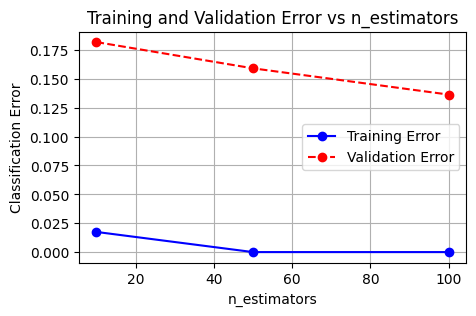

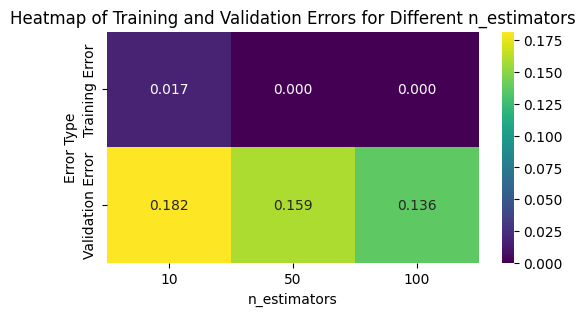


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.970149             0.794118       0.785185                   0.792490
       1.000000             0.852941       0.800000                   0.852437
       1.000000             0.882353       0.837037                   0.852437

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
        0.99005             0.843137       0.807407                   0.832455


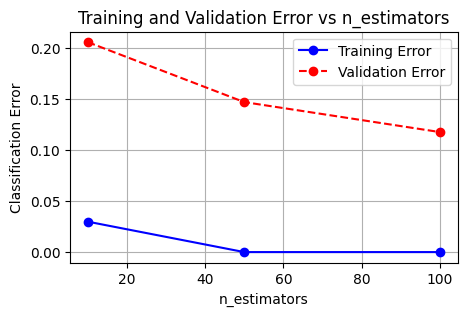

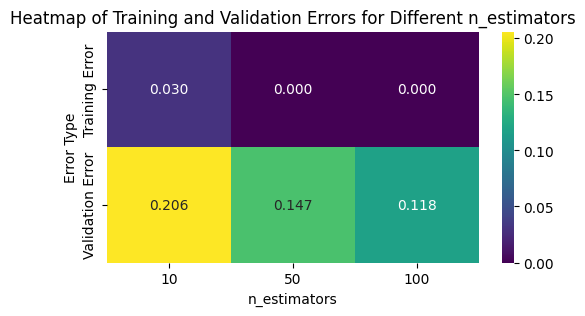


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.727273       0.694444                   0.805556
            1.0             0.750000       0.685185                   0.722222
            1.0             0.750000       0.726852                   0.805556

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.742424        0.70216                   0.777778


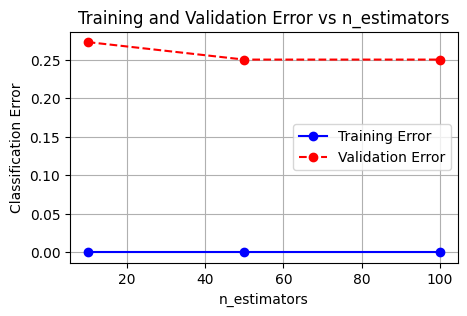

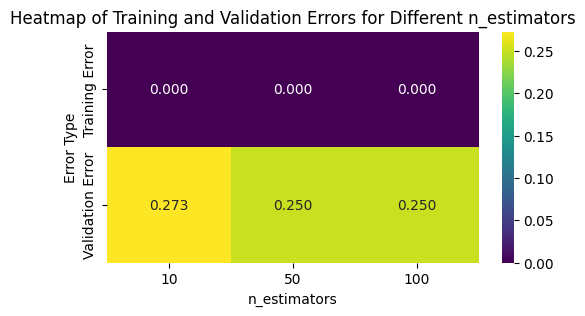

In [24]:
## Heart rf
print("Results for 0.20 Split:\n")
train_and_evaluate_rf(X_heart_train_val_80, y_heart_train_val_80, X_heart_val_20, y_heart_val_20, X_heart_test_20, y_heart_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_rf(X_heart_train_val_50, y_heart_train_val_50, X_heart_val_50, y_heart_val_50, X_heart_test_50, y_heart_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_rf(X_heart_train_val_20, y_heart_train_val_20, X_heart_val_80, y_heart_val_80, X_heart_test_80, y_heart_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.929577       0.852273                   0.889728
            1.0             0.957746       0.875000                   0.903760
            1.0             0.929577       0.897727                   0.882521

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.938967          0.875                   0.892003


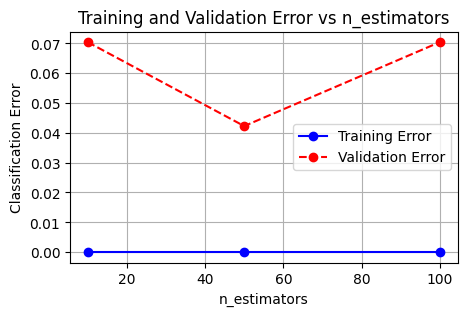

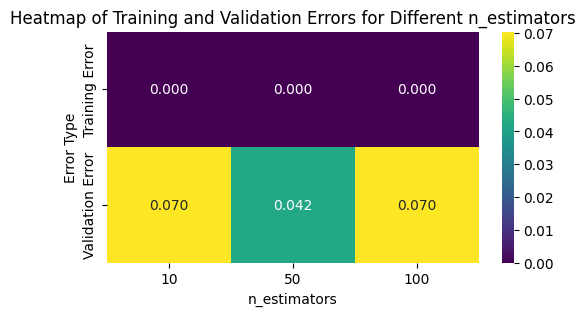


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.909091       0.890909                   0.882132
            1.0             0.918182       0.922727                   0.872623
            1.0             0.936364       0.890909                   0.845345

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.921212       0.901515                     0.8667


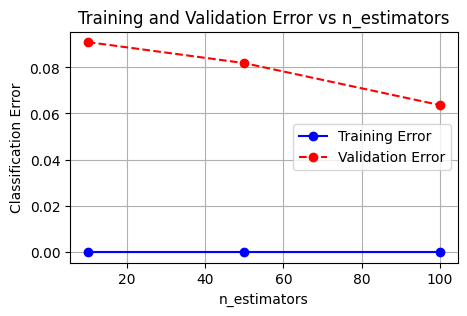

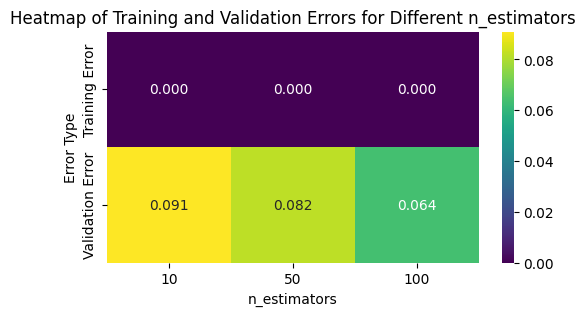


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.941176             0.746479       0.707386                   0.711111
       1.000000             0.830986       0.801136                   0.766667
       1.000000             0.802817       0.752841                   0.777778

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.980392             0.793427       0.753788                   0.751852


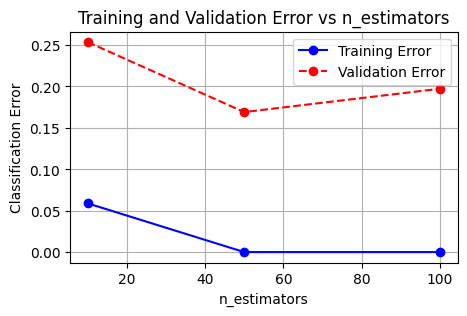

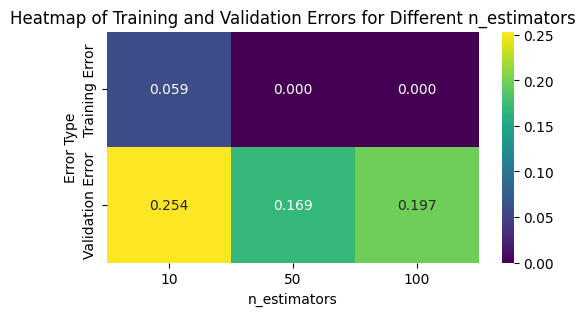

In [25]:
## Wholesale_customers rf
print("Results for 0.20 Split:\n")
train_and_evaluate_rf(X_Wholesale_customers_train_val_80, y_Wholesale_customers_train_val_80, X_Wholesale_customers_val_20, y_Wholesale_customers_val_20, X_Wholesale_customers_test_20, y_Wholesale_customers_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_rf(X_Wholesale_customers_train_val_50, y_Wholesale_customers_train_val_50, X_Wholesale_customers_val_50, y_Wholesale_customers_val_50, X_Wholesale_customers_test_50, y_Wholesale_customers_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_rf(X_Wholesale_customers_train_val_20, y_Wholesale_customers_train_val_20, X_Wholesale_customers_val_80, y_Wholesale_customers_val_80, X_Wholesale_customers_test_80, y_Wholesale_customers_test_80)

Results for 0.20 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.988836             0.738854       0.765306                   0.783094
       0.979266             0.726115       0.775510                   0.800638
       1.000000             0.738854       0.750000                   0.797448

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.989367             0.734607       0.763605                   0.793727


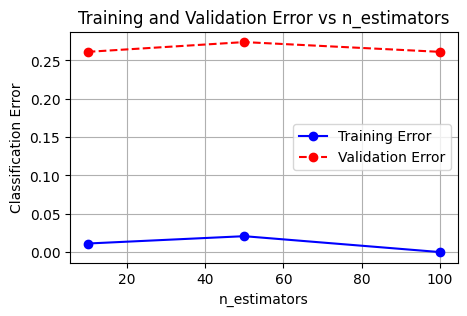

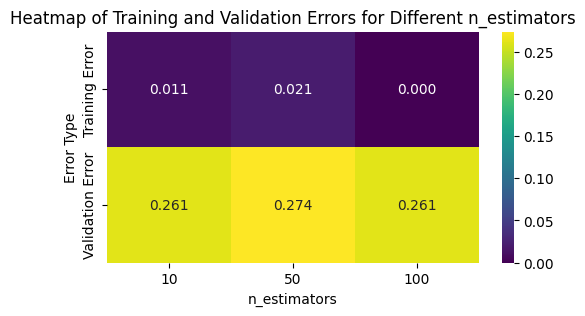


Results for 0.50 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.983673             0.779592       0.736735                   0.747064
       1.000000             0.783673       0.748980                   0.779484
       1.000000             0.763265       0.755102                   0.799859

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
       0.994558              0.77551       0.746939                   0.775469


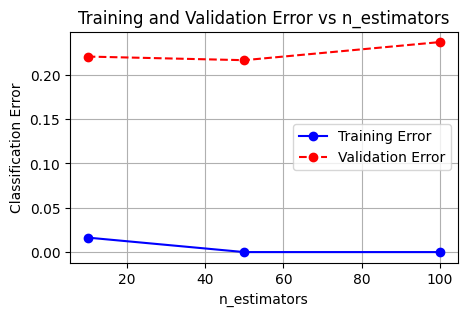

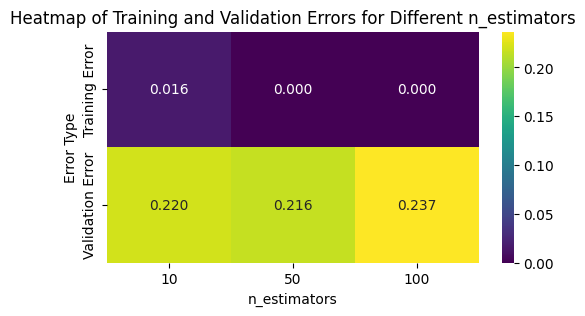


Results for 0.80 Split:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.649682       0.610969                   0.666667
            1.0             0.681529       0.679847                   0.692308
            1.0             0.681529       0.678571                   0.769231

Average Results:

 Train Accuracy  Validation Accuracy  Test Accuracy  Cross-Validation Accuracy
            1.0             0.670913       0.656463                   0.709402


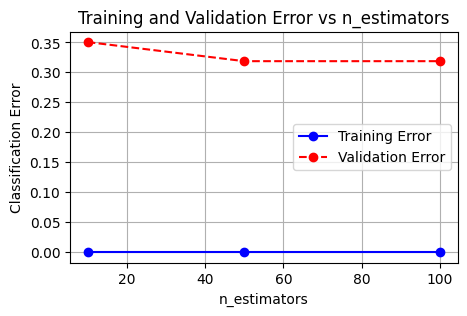

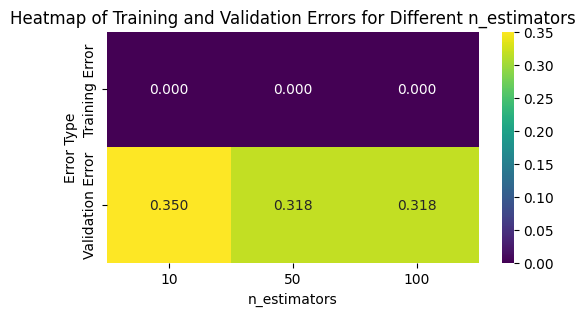

In [26]:
## Tripadvistor rf
print("Results for 0.20 Split:\n")
train_and_evaluate_rf(X_tripadvisor_train_val_80, y_tripadvisor_train_val_80, X_tripadvisor_val_20, y_tripadvisor_val_20, X_tripadvisor_test_20, y_tripadvisor_test_20)
print("\nResults for 0.50 Split:\n")
train_and_evaluate_rf(X_tripadvisor_train_val_50, y_tripadvisor_train_val_50, X_tripadvisor_val_50, y_tripadvisor_val_50, X_tripadvisor_test_50, y_tripadvisor_test_50)
print("\nResults for 0.80 Split:\n")
train_and_evaluate_rf(X_tripadvisor_train_val_20, y_tripadvisor_train_val_20, X_tripadvisor_val_80, y_tripadvisor_val_80, X_tripadvisor_test_80, y_tripadvisor_test_80)

In [27]:
grader.export(pdf=False, force_save=True, run_tests=True, files=['Datasets'])

<IPython.core.display.Javascript object>

Running your submission against local test cases...


Your submission received the following results when run against available test cases:


